<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h1 id="Practical-Data-Science-2016,-Assignment-1">Practical Data Science 2016, Assignment 1<a class="anchor-link" href="#Practical-Data-Science-2016,-Assignment-1">&#182;</a></h1>
<p>In this assignment, we investigate the <a href="http://transtats.bts.gov/Tables.asp?DB_ID=120&amp;DB_Name=Airline%20On-Time%20Performance%20Data&amp;DB_Short_Name=On-Time">Airline On-Time Performance Data</a> for year 2015 </p>

<blockquote><p>Dimitrios Karamanis <br />
Department of Informatics <br />
Athens University of Economics and Business <br />
dkaramanis@aueb.gr</p>
</blockquote>

<h2 id="Question-1">Reading the data<a class="anchor-link" href="#Question-1">&#182;</a></h2>
<p>After downloading 12 files, one per month, and naming them as month_1, month_2 etc, we read only the columns (variables) that we will need for the assignment:</p>



In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#use spefici fields
fields = ['MONTH', 'AIRLINE_ID' , 'UNIQUE_CARRIER','ORIGIN', 'ORIGIN_STATE_ABR', 'DEP_DELAY' , 'DEP_DELAY_NEW' , 'DEST']

#read
flights1 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_1.csv',  usecols=fields)
flights2 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_2.csv',  usecols=fields)
flights3 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_3.csv',  usecols=fields)
flights4 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_4.csv',  usecols=fields)
flights5 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_5.csv', usecols=fields)
flights6 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_6.csv',  usecols=fields)
flights7 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_7.csv',  usecols=fields)
flights8 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_8.csv',  usecols=fields)
flights9 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_9.csv',  usecols=fields)
flights10 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_10.csv',  usecols=fields)
flights11 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_11.csv',  usecols=fields)
flights12 = pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/month_12.csv',  usecols=fields)



### Variable's Description
MONTH:

> Month of the specific flight, taking values between 1 and 12.

AIRLINE_ID: 
>  An identification number assigned by US DOT to identify a unique airline (carrier)

UNIQUE_CARRIER:
> A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.

ORIGIN:
>Origin Airport (3 digit)

ORIGIN_STATE_ABR:
> State Code of Origin Airport (2 digit)

DEP_DELAY:
>Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.

 DEP_DELAY_NEW:
>Difference in minutes between scheduled and actual departure time. Early departures set to 0.

DEST:
> Destination Airport (3 digit)



<p>After reading the 12 files, we merge them through append operation:</p>

In [2]:

flights=pd.DataFrame(flights1)
flights=flights.append(flights2)
flights=flights.append(flights3)
flights=flights.append(flights4)
flights=flights.append(flights5)
flights=flights.append(flights6)
flights=flights.append(flights7)
flights=flights.append(flights8)
flights=flights.append(flights9)
flights=flights.append(flights10)
flights=flights.append(flights11)
flights=flights.append(flights12)

# delete variables to deplete memory
del fields,  flights1, flights2, flights3, flights4, flights5, flights6, flights7, flights8, flights9, flights10, flights11, flights12 


<h2 id="Question-1">Question 1<a class="anchor-link" href="#Question-1">&#182;</a></h2>

------------------------------------------------------------------------------
<i><p>Provide a "misery index" for airports. That is, sort the airports in descending order of the probability that a flight departing from that airport has a delay. Take care of outliers: some airports may have a preposterously low number of flights. We are not interested in them. Your criterion for outliers will be the airports in the lowest 1% percentile in the number of flights.</p><p>After you have done that, go around your data again, but this time you will show the average and median delay for each airport. You may sort the results by either.</p>
<p>Finally, enrich your airport misery index by tabulating both the probability, in descending order, that you will experience a delay at a given airport, and the average and median delay that you are likely to experience.</p></i>

---------------------------------------------------------------------------------------------
<p>First we create a Dataframe <i>que1</i> (question 1) only with the variables needed and delete missing values:</p>


In [3]:
#keep variables for first question
que1=flights[['ORIGIN' , 'DEP_DELAY_NEW']]
#drop if missing values in delay
que1=que1[que1['DEP_DELAY_NEW'].notnull()]

<p>Let's see how many airports are there (that is unique values in column ORIGIN):</p>

In [4]:
que1['ORIGIN'].nunique()


322

<p>Now we will find the outliers. The criterion is the airports in the lowest 1% percentile in the number of flights: </p>

In [5]:
quantile1=float(que1.groupby(['ORIGIN']).count().quantile(0.01))
quantile1

77.21000000000001

<p>Let's see which airports are those with equal or lower number than 77 flights per year: </p>

In [6]:
#show which airports are outliers after creating Series Total_Number_of_Flights_per_airport=TNOF
TNOF=que1.ORIGIN.value_counts()
TNOF[TNOF<quantile1]

DLG    77
GST    76
AKN    63
ITH    30
Name: ORIGIN, dtype: int64

<p>Now we will group the data by origin airport:</p>

In [7]:
#group by origin airport
grouped=que1.groupby('ORIGIN')

# and create rest of the variables
aggregations = {
    'Number_of_Flights':'count',
    'Non_Delayed': lambda x: sum(x==0), 
    'Delayed': lambda x: sum(x>0),   
    'Mean_Delay': np.mean,              
    'Median_Delay': np.median,
    'Probability_of_Delay': lambda x: sum(x>0)/len(x)
}
df = pd.DataFrame(grouped['DEP_DELAY_NEW'].agg(aggregations))
# change the type of specific variables
df['Delayed']=df['Delayed'].astype(int)
df['Non_Delayed']=df['Non_Delayed'].astype(int)
df

,Non_Delayed,Probability_of_Delay,Number_of_Flights,Delayed,Mean_Delay,Median_Delay
ORIGIN,,,,,,
ABE,1796,0.274343,2475,679,12.189899,0.0
ABI,1834,0.245267,2430,596,10.946091,0.0
ABQ,13118,0.369206,20796,7678,11.518225,0.0
ABR,577,0.212824,733,156,12.488404,0.0
ABY,730,0.234801,954,224,12.216981,0.0
ACK,294,0.428016,514,220,20.066148,0.0
ACT,1275,0.243772,1686,411,12.076512,0.0
ACV,951,0.315335,1389,438,16.436285,0.0
ACY,2521,0.332892,3779,1258,13.468113,0.0


<p>Sorting by probability of delay excluding outliers </p>

In [8]:

df[['Number_of_Flights','Probability_of_Delay']].loc[lambda df: df['Number_of_Flights']>quantile1,:].sort_values(by='Probability_of_Delay',ascending=False)


,Number_of_Flights,Probability_of_Delay
ORIGIN,,
GUM,361,0.648199
ADK,98,0.612245
ILG,97,0.567010
MVY,216,0.537037
DAL,64761,0.520761
MDW,86577,0.507352
BWI,92604,0.489460
HOU,55984,0.487014
UST,158,0.481013


<p>Sorting by mean of delay excluding outliers </p>

In [9]:
df[['Number_of_Flights','Mean_Delay']].loc[lambda df: df['Number_of_Flights']>quantile1,:].sort_values(by='Mean_Delay',ascending=False)


,Number_of_Flights,Mean_Delay
ORIGIN,,
ILG,97,33.082474
MVY,216,26.759259
HYA,82,26.048780
PPG,116,25.137931
STC,78,23.410256
OTH,297,22.858586
CEC,174,22.201149
ASE,3348,21.135902
EGE,1209,20.732837


<p>Sorting by median delay excluding outliers </p>

In [10]:
df[['Number_of_Flights','Median_Delay']].loc[lambda df: df['Number_of_Flights']>quantile1,:].sort_values(by='Median_Delay',ascending=False)

,Number_of_Flights,Median_Delay
ORIGIN,,
ADK,98,11.5
GUM,361,5.0
ILG,97,4.0
MVY,216,1.0
MDW,86577,1.0
DAL,64761,1.0
MOT,2042,0.0
MQT,323,0.0
MRY,3075,0.0


 <p>See above all together </p>

In [11]:
df[['Number_of_Flights','Probability_of_Delay','Mean_Delay','Median_Delay']].loc[lambda df: df['Number_of_Flights']>quantile1,:].sort_values(by=['Probability_of_Delay','Mean_Delay','Median_Delay'],ascending=[False,False, False])


,Number_of_Flights,Probability_of_Delay,Mean_Delay,Median_Delay
ORIGIN,,,,
GUM,361,0.648199,16.908587,5.0
ADK,98,0.612245,17.295918,11.5
ILG,97,0.567010,33.082474,4.0
MVY,216,0.537037,26.759259,1.0
DAL,64761,0.520761,13.253517,1.0
MDW,86577,0.507352,13.671887,1.0
BWI,92604,0.489460,14.668967,0.0
HOU,55984,0.487014,13.380895,0.0
UST,158,0.481013,18.772152,0.0


### Question 1, extras
 <p>Now we will sort the airports by mean and median delay, taking  into account only the flights that were actually delayed  </p>

In [12]:
# use specific variables
que1b=flights[['ORIGIN' , 'DEP_DELAY']]
#drop if missing values in delay, keep only delayed flights(DEP_DELAY>0) and drop airports that are outliers (low number of )  
que1b=que1b[(que1b['DEP_DELAY'].notnull()) & (que1b['DEP_DELAY']>0.0) & (~que1b['ORIGIN'].isin(['DLG','GST','AKN','ITH'])) ]
#group and create the dataframe 
grouped=que1b.groupby('ORIGIN')
aggregations_b = {
    'Number_of_Delayed_Flights':'count',
    'Mean_Delay': np.mean,              
    'Median_Delay': np.median,
}
dfb = pd.DataFrame(grouped['DEP_DELAY'].agg(aggregations_b))
dfb 

,Median_Delay,Mean_Delay,Number_of_Delayed_Flights
ORIGIN,,,
ABE,16.0,44.432990,679
ABI,19.0,44.629195,596
ABQ,14.0,31.197317,7678
ABR,18.0,58.679487,156
ABY,27.0,52.031250,224
ACK,18.5,46.881818,220
ACT,23.0,49.540146,411
ACV,35.0,52.123288,438
ACY,18.0,40.457870,1258


 <p>Sort by mean delay the delayed flights: </p>

In [13]:
dfb.sort_values(by='Mean_Delay',ascending=False)


,Median_Delay,Mean_Delay,Number_of_Delayed_Flights
ORIGIN,,,
VEL,20.0,133.600000,10
ESC,40.0,95.648649,74
PLN,54.5,89.220339,118
INL,34.0,86.164706,85
BJI,24.5,78.000000,82
BGM,29.0,74.953846,65
HOB,25.0,71.527473,91
APN,39.0,69.082474,97
DIK,27.5,67.008197,122


 <p>Sort by median delay the delayed flights:  </p>

In [14]:
dfb.sort_values(by='Median_Delay',ascending=False)


,Median_Delay,Mean_Delay,Number_of_Delayed_Flights
ORIGIN,,,
PLN,54.5,89.220339,118
STC,50.0,65.214286,28
CEC,40.0,65.474576,59
ESC,40.0,95.648649,74
APN,39.0,69.082474,97
MMH,36.0,43.183673,49
ACV,35.0,52.123288,438
INL,34.0,86.164706,85
CMI,31.0,59.524444,450


<p>Lets do the same sorting for all flighs taking into account Early departures (negative values in variable DEP_DELAY ) </p>

In [15]:
# use specific variables
que1c=flights[['ORIGIN' , 'DEP_DELAY']]
#drop if missing values in delayand  airports that are outliers (low number of )  
que1c=que1c[(que1c['DEP_DELAY'].notnull())  & (~que1c['ORIGIN'].isin(['DLG','GST','AKN','ITH'])) ]
#group and create the dataframe 
grouped=que1c.groupby('ORIGIN')
aggregations_c = {
    'Number_of_Flights':'count',
    'Mean_Delay': np.mean,              
    'Median_Delay': np.median,
}
dfc = pd.DataFrame(grouped['DEP_DELAY'].agg(aggregations_c))
dfc

,Median_Delay,Mean_Delay,Number_of_Flights
ORIGIN,,,
ABE,-3.0,8.895758,2475
ABI,-5.0,5.646502,2430
ABQ,-2.0,8.623101,20796
ABR,-2.0,9.281037,733
ABY,-4.0,8.860587,954
ACK,-1.0,16.741245,514
ACT,-5.0,6.618624,1686
ACV,-4.0,12.035997,1389
ACY,-4.0,9.291347,3779


<p>Sort by mean number of flights </p>

In [16]:
dfc.sort_values(by='Mean_Delay',ascending=False)


,Median_Delay,Mean_Delay,Number_of_Flights
ORIGIN,,,
ILG,4.0,29.391753,97
MVY,1.0,24.685185,216
HYA,0.0,23.182927,82
PPG,-2.0,20.844828,116
OTH,-2.0,18.969697,297
STC,-3.0,18.692308,78
CEC,-4.0,17.413793,174
ASE,-2.0,17.333035,3348
ACK,-1.0,16.741245,514


<p>Sort by median number of flights </p>

In [17]:
dfc.sort_values(by='Median_Delay',ascending=False)


,Median_Delay,Mean_Delay,Number_of_Flights
ORIGIN,,,
ADK,11.5,11.295918,98
GUM,5.0,15.238227,361
ILG,4.0,29.391753,97
MVY,1.0,24.685185,216
MDW,1.0,12.161648,86577
DAL,1.0,11.880144,64761
UST,0.0,15.000000,158
BWI,0.0,12.893989,92604
HYA,0.0,23.182927,82


<h2 id="Question-2">Question 2<a class="anchor-link" href="#Question-2">&#182;</a></h2>
<i><p>Provide a "misery index" for airlines. That is, do the same thing you did for the airports, but this time we are interested in the airlines that make life difficult for passengers. Sort the airlines in descending order of probability that a flight operated by the airline has a delay. This time we do not care about outliers.</p>
<p>Then, go around your data again, but this time the criterion will be the average and median delay you may expect to have with an airline. Again we do not care about outliers.</p>
<p>And finally, as you would expect,  enrich your airline misery index by tabulating both the probability, in descending order, that you will experience a delay flying with a particular airline, and the average and median delay that you are likely to experience.</p></i>

<p> To sort by and see the exact names of the airlines (not just the ids) we download and use  the Support table for Variable Airline_ID in <a href="url" >http://transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time </a> </p> 

In [18]:
# use columns for question number 2
que2=flights[['AIRLINE_ID' , 'DEP_DELAY_NEW']]

# Read File with Airline Names and give names to Columns (Support table for Variable Airline_ID in http://transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)
airline =pd.read_csv('C:/Users/Owner/Desktop/Practical Data Science Assignment 1/L_AIRLINE_ID.csv-')
airline.columns=['AIRLINE_ID','AIRLINE_NAME']

#merge the two files
que2=pd.merge(que2,airline, on=['AIRLINE_ID'])

#drop if missing values in delay
que2=que2[que2['DEP_DELAY_NEW'].notnull()]



<p> Let's see the number of airlines </p>

In [19]:
# How many airlines are there?
que2['AIRLINE_NAME'].nunique()


14

<p> Create new Dataframe with airlines as observations </p>

In [20]:
#Create new Dataframe with Airline as observations
grouped2=que2.groupby('AIRLINE_NAME')
df2 = pd.DataFrame(grouped2['DEP_DELAY_NEW'].agg(aggregations))


<p> Sort by probability that a flight operated by the airline has a delay </p>

In [22]:
df2['Probability_of_Delay'].sort_values(ascending=False)


AIRLINE_NAME
United Air Lines Inc.: UA                                                                  0.503499
Southwest Airlines Co.: WN                                                                 0.454854
Spirit Air Lines: NK                                                                       0.451167
JetBlue Airways: B6                                                                        0.388296
Frontier Airlines Inc.: F9                                                                 0.386455
Virgin America: VX                                                                         0.380859
American Airlines Inc.: AA                                                                 0.343634
Envoy Air: MQ                                                                              0.334399
Delta Air Lines Inc.: DL                                                                   0.323860
US Airways Inc.: US (Merged with America West 9/05. Reporting for both starting 10/07.)

<p> Sort by average delay per airline </p>

In [23]:
df2['Mean_Delay'].sort_values(ascending=False)


AIRLINE_NAME
Spirit Air Lines: NK                                                                       18.914780
Frontier Airlines Inc.: F9                                                                 17.212991
United Air Lines Inc.: UA                                                                  16.415175
JetBlue Airways: B6                                                                        14.606594
Envoy Air: MQ                                                                              13.430798
ExpressJet Airlines Inc.: EV                                                               12.450665
Southwest Airlines Co.: WN                                                                 12.259402
American Airlines Inc.: AA                                                                 11.810846
SkyWest Airlines Inc.: OO                                                                  11.615175
Virgin America: VX                                                            

<p> Sort by median delay per airline </p>

In [24]:
df2['Median_Delay'].sort_values(ascending=False)

AIRLINE_NAME
United Air Lines Inc.: UA                                                                  1.0
Virgin America: VX                                                                         0.0
US Airways Inc.: US (Merged with America West 9/05. Reporting for both starting 10/07.)    0.0
Spirit Air Lines: NK                                                                       0.0
Southwest Airlines Co.: WN                                                                 0.0
SkyWest Airlines Inc.: OO                                                                  0.0
JetBlue Airways: B6                                                                        0.0
Hawaiian Airlines Inc.: HA                                                                 0.0
Frontier Airlines Inc.: F9                                                                 0.0
ExpressJet Airlines Inc.: EV                                                               0.0
Envoy Air: MQ                        

<p> Put the three variables together </p>

In [25]:
df2[['Probability_of_Delay','Mean_Delay','Median_Delay']].sort_values(by='Probability_of_Delay',ascending=False)


,Probability_of_Delay,Mean_Delay,Median_Delay
AIRLINE_NAME,,,
United Air Lines Inc.: UA,0.503499,16.415175,1.0
Southwest Airlines Co.: WN,0.454854,12.259402,0.0
Spirit Air Lines: NK,0.451167,18.914780,0.0
JetBlue Airways: B6,0.388296,14.606594,0.0
Frontier Airlines Inc.: F9,0.386455,17.212991,0.0
Virgin America: VX,0.380859,11.534675,0.0
American Airlines Inc.: AA,0.343634,11.810846,0.0
Envoy Air: MQ,0.334399,13.430798,0.0
Delta Air Lines Inc.: DL,0.323860,9.614567,0.0


<b><ins><p><mark> Again we could do the same sorting analysis as in question 1, namely we could take into account early departures or only delayed flights </mark></p></ins></b>

<h2 id="Question-3">Question 3<a class="anchor-link" href="#Question-3">&#182;</a></h2>
<i><p>Create a histogram that shows the distribution of departures for airports. That is, the x-axis will be bins containing flights and the y-axis will be the number of airports with departing flights in each particular bin.</p></i>

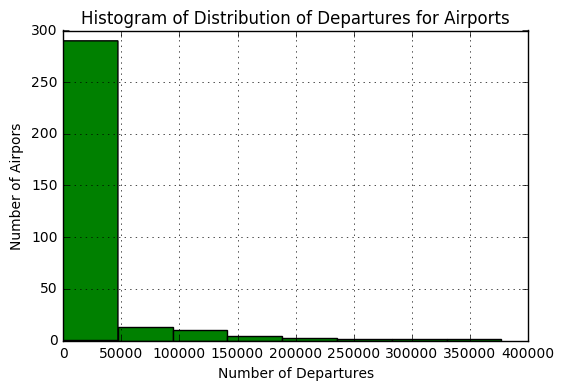

In [26]:
%matplotlib inline 
#Number of Flights per airport has already been created in question 1 so:
que3=pd.DataFrame(df['Number_of_Flights'])

#create Histogram, give color and specify the number of bins 
que3['Number_of_Flights'].hist(facecolor='green', bins=8) 

# Title of the Histogram
plt.title('Histogram of Distribution of Departures for Airports')

#Give titles to the axes 
plt.xlabel('Number of Departures')
plt.ylabel('Number of Airpors')

#Grids to the Histogram
plt.grid(True)
plt.show()

<h2 id="Question-4">Question 4<a class="anchor-link" href="#Question-4">&#182;</a></h2>
<i><p>We are interested in the temporal distribution of delays, so create a plot that shows the number of flights and the number of delayed flights per month of year.</p></i>


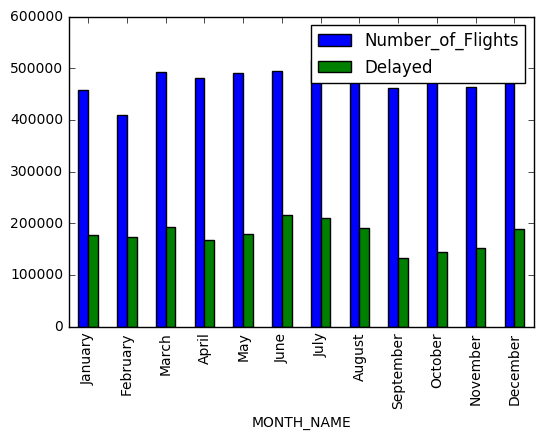

In [27]:
#use specific columns from the initial created dataset and drop missing values 
que4=flights[['MONTH' , 'DEP_DELAY_NEW']]
que4=que4[que4['DEP_DELAY_NEW'].notnull()]

#mapping the months
month={
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'    
}
#Add extra variable for the  month's name
que4['MONTH_NAME']=que4['MONTH'].map(month)

#Group by Month
grouped4=que4.groupby('MONTH_NAME')
df4 = pd.DataFrame(grouped4['DEP_DELAY_NEW'].agg(aggregations))

#Put in order  with loc function and create new Dataframe
df4plot = pd.DataFrame(df4.loc[['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September','October', 'November', 'December' ],['Number_of_Flights','Delayed']])
df4plot

# create histogram
df4plot.plot.bar()


<p>Create plot:</p>

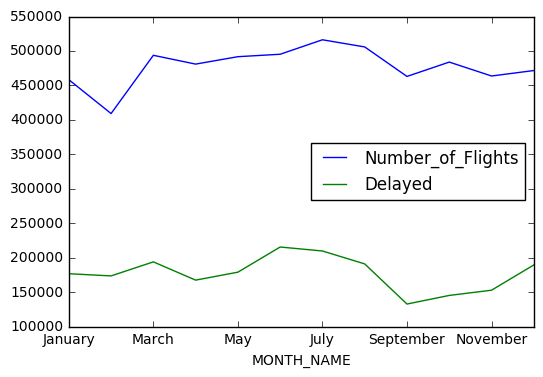

In [28]:
df4plot.plot()


<h2 id="Question-5">Question 5<a class="anchor-link" href="#Question-5">&#182;</a></h2><i><p>Provide a table that shows, for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. With this table at hand, show how you can determine the best airline for a particular pair of origin and destination airports.</p></i>

In [29]:
#use specific columns
que5=flights[['ORIGIN' ,'DEST', 'DEP_DELAY_NEW', 'UNIQUE_CARRIER']]
#drop if missing values in delay
que5=que5[que5['DEP_DELAY_NEW'].notnull()]
#group by Variables ORIGIN,DEST and UNIQUE_CARRIER and find mean delay
grouped5=que5.groupby(['ORIGIN' ,'DEST', 'UNIQUE_CARRIER'])    
df5 = pd.DataFrame(grouped5['DEP_DELAY_NEW'].mean())
#put index as column
df5['UNIQUE_CARRIER'] = df5.index.get_level_values('UNIQUE_CARRIER')
df5

DEP_DELAY_NEW UNIQUE_CARRIER
ORIGIN DEST UNIQUE_CARRIER                              
ABE    ATL  DL                   4.876106             DL
            EV                  11.147959             EV
            OO                   7.960784             OO
       DTW  EV                  13.909326             EV
       ORD  EV                  14.921379             EV
ABI    DFW  MQ                  10.946091             MQ
ABQ    ATL  DL                   9.776655             DL
       BWI  WN                  12.075704             WN
       CLT  AA                   2.521739             AA
            US                   8.000000             US
       DAL  WN                  13.255543             WN
       DEN  EV                   6.520833             EV
            OO                  11.157480             OO
            UA                  17.334471             UA
            WN                  13.172277             WN
       DFW  AA                  12.934469             AA
       HOU  WN                  10.132483             WN
       IAH  EV                  12.784530             EV
            OO                  11.962085             OO
            UA                  10.112903             UA
       JFK  B6                  18.732441             B6
       LAS  WN                  10.675872             WN
       LAX  OO                  11.284394             OO
            WN                  11.744533             WN
       MCI  WN                  11.763006             WN
       MCO  WN                  11.939394             WN
       MDW  WN                  11.974576             WN
       MSP  DL                   6.865854             DL
       OAK  WN                  11.794489             WN
       ORD  MQ                  15.050485             MQ
...                                   ...            ...
VPS    IAH  OO                  16.234375             OO
WRG    KTN  AS                  10.907042             AS
       PSG  AS                  11.164804             AS
WYS    SLC  OO                   4.778846             OO
XNA    ATL  DL                   5.463866             DL
            EV                  12.343816             EV
            OO                   5.956044             OO
       CVG  EV                   3.694444             EV
            OO                  12.791908             OO
       DEN  EV                   9.241379             EV
            OO                  12.246201             OO
       DFW  AA                   0.200000             AA
            EV                  32.733333             EV
            MQ                  15.677349             MQ
       EWR  EV                  22.242424             EV
       IAH  EV                  12.000000             EV
            OO                   0.000000             OO
       LGA  MQ                  23.417132             MQ
       MSP  DL                   0.000000             DL
            EV                  15.769231             EV
            OO                  11.487755             OO
       ORD  AA                   0.000000             AA
            EV                  15.034884             EV
            MQ                  19.926265             MQ
            OO                  22.287293             OO
       SFO  OO                   9.385965             OO
       SLC  OO                   0.000000             OO
YAK    CDV  AS                   8.181058             AS
       JNU  AS                   4.283333             AS
YUM    PHX  OO                   7.163959             OO

[8600 rows x 2 columns]

<p> The best airline for a particulare pair of origin and destination airport could be determined with a function: </p>

In [30]:
def best_air(x,y):
    return df5.loc[([x], [y]),['DEP_DELAY_NEW','UNIQUE_CARRIER']].min()
  
best_air('ABE','ATL')

DEP_DELAY_NEW     4.87611
UNIQUE_CARRIER         DL
dtype: object

In [31]:
best_air('XNA','ATL')

DEP_DELAY_NEW     5.46387
UNIQUE_CARRIER         DL
dtype: object